## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
count0 = df.query('converted == 0')['user_id']
count1 = df.query('converted == 1')['user_id']
count1_prop = len(count1) / (len(count0) + len(count1))
count1_prop

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df_new = df.query('group == "treatment"')
value1 = df_new.query('landing_page == "old_page"')['user_id'].count()
df_new = df.query('group == "control"')
value2 =df_new.query('landing_page == "new_page"')['user_id'].count()
value1+value2

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#match the treatment group with the new page landing 
#and match the control group with the ol page landing
df2 = df.query('(group == "treatment" and landing_page == "new_page") or (group != "treatment" and landing_page != "new_page")')

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [10]:
df2.shape

(290585, 5)

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2.duplicated(['user_id'])]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2 = df2.drop_duplicates(['user_id'])

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
count0= df2.query('converted == 0')['user_id'].count()
count1 = df2.query('converted == 1')['user_id'].count()
count_prop = count1 / (count0 + count1)
count_prop

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
count_c = df2.query('converted == 1 and group == "control"')['user_id'].count()
count_all_c = df2.query('group == "control"')['user_id'].count()
prop_control = count_c / count_all_c
prop_control 

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [47]:
count_t = df2.query('converted == 1 and group == "treatment"')['user_id'].count()
count_all_t = df2.query('group == "treatment"')['user_id'].count()
prop_treatment = count_t / count_all_t
prop_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [48]:
count_new = df2.query('landing_page == "new_page"')['user_id'].count()
count_old = df2.query('landing_page == "old_page"')['user_id'].count()
count_new_prop = count_new / (count_old + count_new)
count_new_prop

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Looking for the pervious results:**
we obtine 11% who converted and 12% who were converted and in the control group where those in the treatment group obtine 12%. For the landing new page about 50% have receved it.
**Therefore** there's no evidence that the new page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Q1:**  <br><br>
        H0 --> **$p_{new}$** - **$p_{old}$** <= 0  <br><br>
        H1 --> **$p_{new}$** - **$p_{old}$** > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [49]:
#assuming the new & old page have the equal converted rate
p_null_n = df2.converted.mean()
p_null_n

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [50]:
p_null_o = df2.converted.mean()
p_null_o

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [51]:
num_treatment = df2.query('landing_page =="new_page"')['converted'].count()
num_treatment

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [52]:
num_control = df2.query('landing_page =="old_page"')['converted'].count()
num_control

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [53]:
#using binomial sampleing with one trail
new_page_converted = np.random.binomial(1,p_null_n,num_treatment) 
new_page_converted.mean()

0.11954442226963044

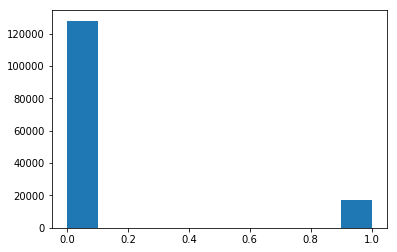

In [54]:
plt.hist(new_page_converted);

>the histogram shows the probability of success it's less than the probability of failure with the new page.

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [55]:
old_page_converted = np.random.binomial(1,p_null_o,num_control) 
old_page_converted.mean()

0.11967041590374052

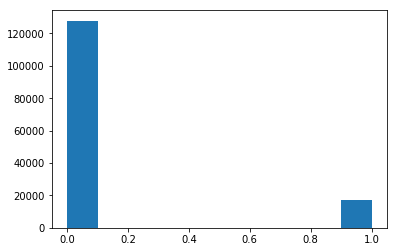

In [56]:
plt.hist(old_page_converted);

>The histogram shows the probability of success it's less than the probability of failure with the old page.

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [57]:
#we calculate the differences in simulated sample to see if it
#correct and significant.
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff.mean()

-0.0001259936341100748

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [58]:
new_page_converted = np.random.binomial(num_treatment,p_null_n,10000)/num_treatment
old_page_converted = np.random.binomial(num_control,p_null_o, 10000)/num_control
p_diffs = new_page_converted - old_page_converted
new_page_converted.mean(), old_page_converted.mean()

(0.11959984722317804, 0.11958974145407987)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

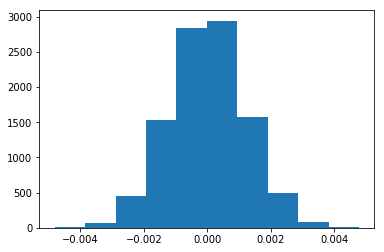

In [59]:
plt.hist(p_diffs);

In [60]:
control_convert_actual = df2.query('group == "control"')['converted'].mean()
treatment_convert_actual = df2.query('group == "treatment"')['converted'].mean()
actual_diffs = treatment_convert_actual - control_convert_actual

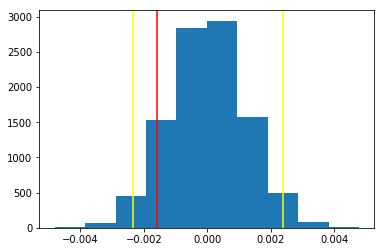

In [61]:
lower = np.percentile(p_diffs, 2.5)
upper =  np.percentile(p_diffs, 97.5)
plt.hist(p_diffs);
plt.axvline(x=lower, color='yellow', linewidth=1.5);
plt.axvline(x=upper, color='yellow', linewidth=1.5);
plt.axvline(x=actual_diffs, color='red', linewidth=1.5);

>**i** yes it looks like what I expected according to the Limit Central Theory which states that with a large enough sample size the sampling distribution of the mean will be normally distributed.
with a 95% confidence interval, the majority of the data exist between the
scale which means that our null hypothesis did come from our statistics.

In [62]:
lower , upper

(-0.002356278172276031, 0.0023861770438074865)

>We are 95% confident, the population mean falls between the bounds -0.0024 and 0.0024. Since our confidence interval contains zero, that means we don't have strong evidence that the mean of converted people associated with the new page is greater than the mean of converted people associated with the old page.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [63]:
(p_diffs > actual_diffs).mean()

0.90910000000000002

In [81]:
(np.array(p_diffs) > actual_diffs).mean()

0.90910000000000002

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**k** the number we calculate is called the P-value which means the probability of observing your statistic if the null hypothesis is true. considering a type 1 error with 0.05% of our p-value which is greater than 0.05%, then we fail to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [64]:
import statsmodels.api as sm

convert_old = df2.query("landing_page == 'old_page' and converted == 1")['user_id'].count()
convert_new = df2.query("landing_page == 'new_page' and converted == 1")['user_id'].count()
n_old = df2.query("landing_page == 'old_page'")['user_id'].count()
n_new = df2.query("landing_page == 'new_page'")['user_id'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [65]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new] ,[n_old, n_new], alternative = 'smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

When the p-value is very small, 
it means it is very unlikely (small probability)
that the observed spatial pattern is the result of random processes,
so you can reject the null hypothesis

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**n** The p-value is larger than 0.05 and the z-score falls between -1.96 and +1.96 standard deviations and we need to reject the null.<br>
our p-value dose match with the one we found in j part.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Q1a** Because we have only two possible outcomes conversion or no conversion we will use logistic regression which is a regression approach used to predict only two possible outcomes.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [66]:
df2[['control','ab_page']] = pd.get_dummies(df.group)
df2['intercept'] = 1
df2 = df2.drop('control', axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [67]:
logit_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [68]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-12 06:34 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [69]:
1/np.exp(-0.0150)

1.0151130646157189

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**e** In regression, P-value is given for testing if the parameter for the intercept or slope are equal to 0 in the null hypothesis, and in the alternative p-value is not equal to. where in part 2 is testing wheater the difference in the mean is less than or equal to 0 and for the alternatve is bigger than the 0.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**f** As we have seen the ab_page does not have a significant impact on the converted rate therefore, it's a good idea to start thinking of other factors that may have a significant impact on the converted rate.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [70]:
df_countries = pd.read_csv('countries.csv')
df_new = df_countries.set_index('user_id').join(df2.set_index('user_id'))
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [71]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [72]:
df_new[['UK','US','CA']] = pd.get_dummies(df_new.country)
df_new = df_new.drop('CA', axis=1)
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [73]:
logit_mod = sm.Logit(df_new['converted'],df_new[['intercept','UK','US']])
results3 = logit_mod.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-12 06:34 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
UK           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
US            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

In [74]:
1/np.exp(-0.0408), np.exp(0.0099)

(1.0416437559600236, 1.0099491671175422)

UK is 1.042 less likely compared to our baseline(CA).<br><br> 
US is 1.010 more likely compared to our baseline(CA).

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [75]:
df_new['ab_UK'] = df_new['ab_page'] * df_new['UK']
df_new['ab_US'] = df_new['ab_page'] * df_new['US']
lm3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','UK' , 'US', 'ab_UK', 'ab_US']])
results = lm3.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-12 06:35 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
UK           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
US           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
ab_UK        -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
ab_US         0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
==================================================================

"""

The regression summary illustrate the niether the country or the page type
is consider significant evedince for impact on the converted state.
although all the satistical analysis 
dosen't provide us with a strong eviednce to reject the null hypothises, 
based on type 1 error. actually it seems there is no significant diffrent 
whearther to change to the new page or stay with old page.
I'd suggest to stay with the old page inorder to be practical and reduce 
any ferther unneccary changes.

In [76]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0